# 1 Dependencies import

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts import quickml
from scripts.utils import fill_infos

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

np.random.seed(294697)

***
# 2 Data import

For performance reasons, i choose to write a function that allow me to "chunk" the dataset and only take a percentage. I use a method for taking randomly the rows in each chunk, the result is that the output dataset have the same shape than if it was the original one.

In [154]:
original_dataset = quickml.read_csv(pd, np, "./datas/en.openfoodfacts.org.products.csv", 5, delimiter="\t")

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,13,64) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (0,8,13,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaco

In [155]:
rows_nb, cols_nb = original_dataset.shape
original_dataset.shape

(95365, 186)

In [156]:
original_dataset.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
57521,28400081498,http://world-en.openfoodfacts.org/product/0028...,openfoodfacts-contributors,1577935741,2020-01-02T03:29:01Z,1622051938,2021-05-26T17:58:58Z,Cheetos,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61462,30000315972,http://world-en.openfoodfacts.org/product/0030...,org-database-usda,1587639086,2020-04-23T10:51:26Z,1587639087,2020-04-23T10:51:27Z,Cap'N Crunch Sweetened Corn & Oat Cereal 1.51 ...,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19388,0012000684548,http://world-en.openfoodfacts.org/product/0012...,org-database-usda,1587648518,2020-04-23T13:28:38Z,1587648519,2020-04-23T13:28:39Z,Soda,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79791,36800334991,http://world-en.openfoodfacts.org/product/0036...,org-database-usda,1587661793,2020-04-23T17:09:53Z,1587661793,2020-04-23T17:09:53Z,Fuji apples,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30992,17077316064,http://world-en.openfoodfacts.org/product/0017...,org-database-usda,1587658212,2020-04-23T16:10:12Z,1587658212,2020-04-23T16:10:12Z,Organic farmer cheese,NaN,NaN,...,NaN,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
data = original_dataset.copy()

***
# 3 Cleaning

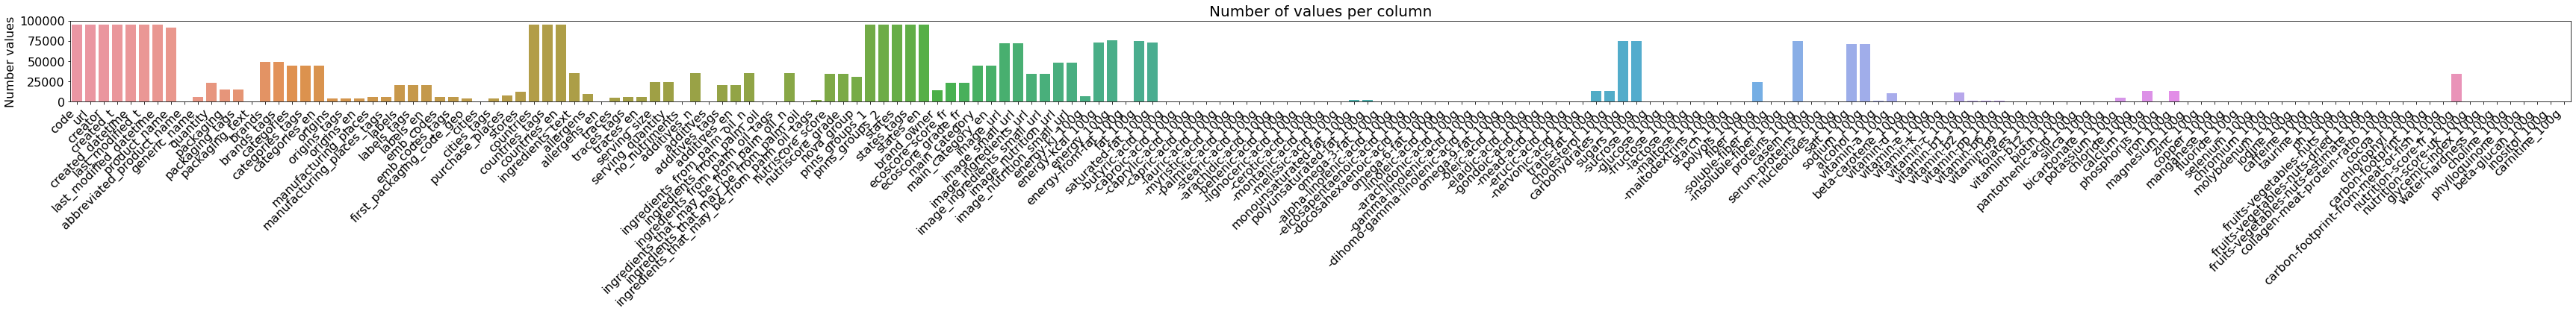

In [158]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=data.columns, y=data.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

### Shape comparison with original dataset

Original dataset  
![dataset_100_percent](images/global_overview_100p.png)

In [159]:
features = []

***
## 3.1 General informations group

### 3.1.1 Overview

In [160]:
general_infos_features = data.loc[:, "code":"quantity"].columns
general_infos_features

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity'],
      dtype='object')

In [161]:
general_infos = data.loc[:, general_infos_features]

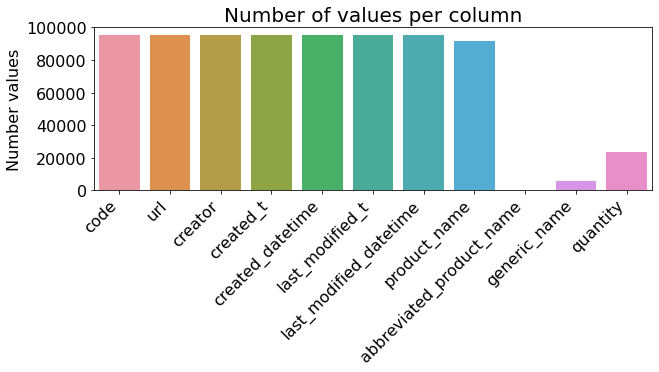

In [162]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [163]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity
57521,28400081498,http://world-en.openfoodfacts.org/product/0028...,openfoodfacts-contributors,1577935741,2020-01-02T03:29:01Z,1622051938,2021-05-26T17:58:58Z,Cheetos,NaN,NaN,28.8 oz (1 lb.12.8 oz)816.4g
61462,30000315972,http://world-en.openfoodfacts.org/product/0030...,org-database-usda,1587639086,2020-04-23T10:51:26Z,1587639087,2020-04-23T10:51:27Z,Cap'N Crunch Sweetened Corn & Oat Cereal 1.51 ...,NaN,NaN,NaN
19388,0012000684548,http://world-en.openfoodfacts.org/product/0012...,org-database-usda,1587648518,2020-04-23T13:28:38Z,1587648519,2020-04-23T13:28:39Z,Soda,NaN,NaN,NaN
79791,36800334991,http://world-en.openfoodfacts.org/product/0036...,org-database-usda,1587661793,2020-04-23T17:09:53Z,1587661793,2020-04-23T17:09:53Z,Fuji apples,NaN,NaN,NaN
30992,17077316064,http://world-en.openfoodfacts.org/product/0017...,org-database-usda,1587658212,2020-04-23T16:10:12Z,1587658212,2020-04-23T16:10:12Z,Organic farmer cheese,NaN,NaN,NaN


In [164]:
general_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      95365 non-null  object
 1   url                       95365 non-null  object
 2   creator                   95364 non-null  object
 3   created_t                 95365 non-null  int64 
 4   created_datetime          95365 non-null  object
 5   last_modified_t           95365 non-null  int64 
 6   last_modified_datetime    95365 non-null  object
 7   product_name              91404 non-null  object
 8   abbreviated_product_name  348 non-null    object
 9   generic_name              5924 non-null   object
 10  quantity                  23818 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.7+ MB


***
### 3.1.2 Usability

#### 3.1.2.1 Usability: Quantity

In [165]:
general_infos[general_infos.quantity.notna()].quantity.head(10)

57521    28.8 oz (1 lb.12.8 oz)816.4g
52867                             220
47266                            150g
18953                           355ml
58766         37.5 g, 15 tea piramids
67906                           145 g
88340                           120 g
17766                            6 oz
32338                  670gr 24 etuis
96868                           19 oz
Name: quantity, dtype: object

The feature "quantity" is highly non homogeneous and will be very difficult to use. We will not keep it.

In [166]:
general_infos.drop(columns=["quantity"], inplace=True)

***
### 3.1.3 Redundancy

#### 3.1.3.1 Redundancy: product_name, abbreviated_product_name, generic_name

In [167]:
general_infos[general_infos.generic_name.notna()].product_name.isna().sum()

12

We can see that 'abbreviated_product_name' contains too fews entries to be usefull.  
Regarding the 'generic_name', the fill percentage is not very high, but worst, each time 'generic_name' is filled, so is 'product_name'.

In [168]:
general_infos.drop(columns=["abbreviated_product_name", "generic_name"], inplace=True)

***
### 3.1.4 Conclusion

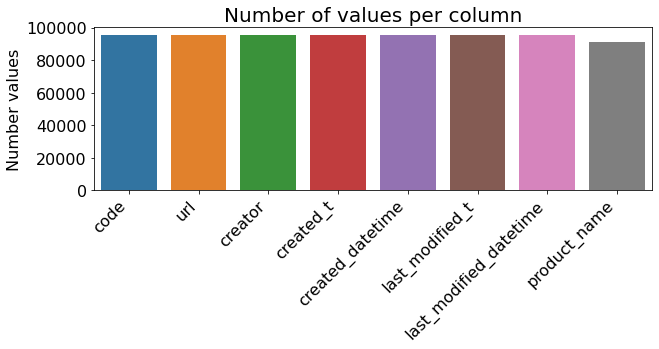

In [169]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos.columns, y=general_infos.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.1.4.1 Original

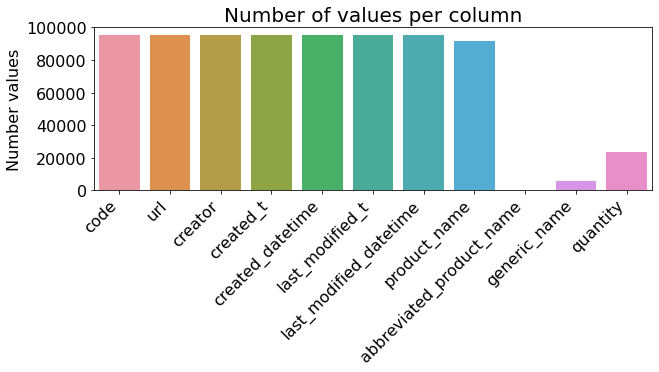

In [170]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=general_infos_features, y=data[general_infos_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.2 Tags group

### 3.2.1 Overview

In [171]:
tags_features = data.loc[:, "packaging":"countries_en"].columns
tags_features

Index(['packaging', 'packaging_tags', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en'],
      dtype='object')

In [172]:
tags = data.loc[:, tags_features]

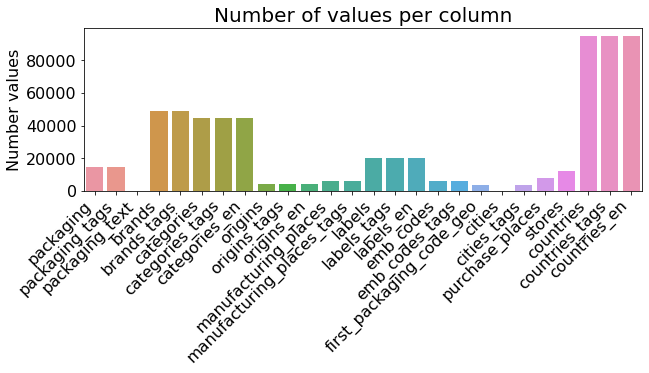

In [173]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [174]:
tags.head()

,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,...,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en
57521,NaN,NaN,NaN,Fritos Lay,fritos-lay,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,USA,Costco,en:United States,en:united-states,United States
61462,NaN,NaN,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
19388,NaN,NaN,NaN,NaN,NaN,"Beverages, Carbonated drinks, Sodas","en:beverages,en:carbonated-drinks,en:sodas","Beverages,Carbonated drinks,Sodas",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
79791,NaN,NaN,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States
30992,NaN,NaN,NaN,NaN,NaN,"Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States


In [175]:
tags.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   packaging                  14892 non-null  object
 1   packaging_tags             14889 non-null  object
 2   packaging_text             275 non-null    object
 3   brands                     49080 non-null  object
 4   brands_tags                49076 non-null  object
 5   categories                 44841 non-null  object
 6   categories_tags            44841 non-null  object
 7   categories_en              44841 non-null  object
 8   origins                    4105 non-null   object
 9   origins_tags               4091 non-null   object
 10  origins_en                 4091 non-null   object
 11  manufacturing_places       6022 non-null   object
 12  manufacturing_places_tags  6015 non-null   object
dtypes: object(13)
memory usage: 10.2+ MB


In [176]:
tags.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    20344 non-null  object 
 1   labels_tags               20345 non-null  object 
 2   labels_en                 20345 non-null  object 
 3   emb_codes                 5979 non-null   object 
 4   emb_codes_tags            5976 non-null   object 
 5   first_packaging_code_geo  3659 non-null   object 
 6   cities                    0 non-null      float64
 7   cities_tags               3948 non-null   object 
 8   purchase_places           7797 non-null   object 
 9   stores                    12071 non-null  object 
 10  countries                 95074 non-null  object 
 11  countries_tags            95074 non-null  object 
 12  countries_en              95074 non-null  object 
dtypes: float64(1), object(12)
memory usage: 10.2+ MB


***
### 3.2.2 Usability

#### 3.2.2.1 Usability: packaging_text

In [177]:
tags.packaging_text.notna().sum()

275

In [178]:
tags.drop(columns=["packaging_text"], inplace=True)

***
#### 3.2.2.2 Usability: cities

In [179]:
tags.cities.notna().sum()

0

In [180]:
tags.drop(columns=["cities"], inplace=True)

***
### 3.2.3 Redundancy

#### 3.2.3.1 Redundancy: packaging, packaging_tags

In [181]:
tags.loc[:, ["packaging", "packaging_tags"]].loc[tags.packaging.notna() & tags.packaging_tags.notna()].iloc[:20]

,packaging,packaging_tags
47266,"plastic wrap,plastic tray, en:pet-tray","plastic-wrap,plastic-tray,en-pet-tray"
18953,"Canned, en:Bottle","canned,en-bottle"
58766,"boite,sachet","boite,sachet"
67906,conserve,conserve
9041,"en:card-box, en:foil-packet","en-card-box,en-foil-packet"
60050,en:glass-jar,en-glass-jar
32338,boite en carton,boite-en-carton
1957,en:carton,en-carton
96868,"can, en:aluminium-tin","can,en-aluminium-tin"
19303,en:Bottle,en-bottle


In [182]:
tags[tags.packaging_tags.notna()].loc[:,["packaging"]].isna().sum()

packaging    0
dtype: int64

We can see that each time one of the features "packaging" or "packaging_tags" is filled, the other is also filled.
We will keep the feature "packaging" because it transport more information, plus, it's easier to get rid of the "en:", "fr:" than "en-", because in "packaging_tags" each separator is a "-" and not in "packaging".

In [183]:
tags.drop(columns=["packaging_tags"], inplace=True)

***
#### 3.2.3.2 Redundancy: brands, brands_tags

In [184]:
tags.iloc[:20].loc[:, ["brands", "brands_tags"]]

,brands,brands_tags
57521,Fritos Lay,fritos-lay
61462,NaN,NaN
19388,NaN,NaN
79791,NaN,NaN
30992,NaN,NaN
70788,Solgar,solgar
9215,Kroger,kroger
70906,NaN,NaN
52867,NaN,NaN
76602,"Market Basket, Hans Kissle Co. Inc.","market-basket,hans-kissle-co-inc"


In [185]:
tags[tags.brands_tags.notna()].loc[:,["brands"]].isna().sum()

brands    0
dtype: int64

The features "brands" and "brands_tags" are almost equally filled. We will keep "brands" because this feature carry most information (spaces, capital letters...)

In [186]:
tags.drop(columns=["brands_tags"], inplace=True)

***
#### 3.2.3.3 Redundancy: categories, categories_tags, categories_en

In [187]:
tags.loc[:, ["categories", "categories_tags", "categories_en"]].iloc[:20]

,categories,categories_tags,categories_en
57521,NaN,NaN,NaN
61462,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
19388,"Beverages, Carbonated drinks, Sodas","en:beverages,en:carbonated-drinks,en:sodas","Beverages,Carbonated drinks,Sodas"
79791,"Plant-based foods and beverages, Plant-based f...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
30992,"Dairies, Fermented foods, Fermented milk produ...","en:dairies,en:fermented-foods,en:fermented-mil...","Dairies,Fermented foods,Fermented milk product..."
70788,"Suplementos dietéticos, Vitaminas","en:dietary-supplements,en:vitamins","Dietary supplements,Vitamins"
9215,NaN,NaN,NaN
70906,NaN,NaN,NaN
52867,NaN,NaN,NaN
76602,NaN,NaN,NaN


In [188]:
tags[tags.categories.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

In [189]:
tags[tags.categories_tags.notna()].loc[:,["categories_en"]].isna().sum()

categories_en    0
dtype: int64

We will keep "categories_en".

In [190]:
tags.drop(columns=["categories", "categories_tags"], inplace=True)

***
#### 3.2.3.4 Redundancy: origins, origins_tags, origins_en

In [191]:
tags.loc[:, ["origins", "origins_tags", "origins_en"]].loc[tags.origins.notna() & tags.origins_tags.notna() & tags.origins_en.notna()].iloc[:20]

,origins,origins_tags,origins_en
58766,China,en:china,China
71811,"Arden Hilss,Minnesota","en:arden-hilss,en:minnesota","Arden-hilss,Minnesota"
52544,United States,en:united-states,United States
52039,México,en:mexico,Mexico
21362,États-Unis,en:etats-unis,Etats-unis
23380,Philippines,en:philippines,Philippines
30109,"United States,Brazil","en:united-states,en:brazil","United States,Brazil"
3690,Royaume-Uni,en:united-kingdom,United Kingdom
49512,Indian,en:indian,Indian
14492,Estados Unidos,en:united-states,United States


In [192]:
tags[tags.origins_tags.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

In [193]:
tags[tags.origins_en.notna()].loc[:,["origins"]].isna().sum()

origins    0
dtype: int64

We will keep the feature "origins"

In [194]:
tags.drop(columns=["origins_tags", "origins_en"], inplace=True)

***
#### 3.2.3.5 Redundancy: manufacturing_places, manufacturing_places_tags

In [195]:
tags.loc[:, ["manufacturing_places", "manufacturing_places_tags"]].loc[tags.manufacturing_places.notna() & tags.manufacturing_places_tags.notna()].iloc[:20]

,manufacturing_places,manufacturing_places_tags
47266,UK,uk
32338,saint yrieix,saint-yrieix
66171,USA,usa
57269,usa,usa
71811,Minnesota USA,minnesota-usa
52039,México,mexico
72328,Poland,poland
43259,"Pleasanton, CA","pleasanton,ca"
14545,United States,united-states
28178,France,france


We will keep the feature "manufacturing_places"

In [196]:
tags.drop(columns=["manufacturing_places_tags"], inplace=True)

***
#### 3.2.3.6 labels, labels_tags, labels_en

In [197]:
tags.loc[:, ["labels", "labels_tags", "labels_en"]].loc[tags.labels.notna() & tags.labels_en.notna() & tags.labels_en.notna()].iloc[:20]

,labels,labels_tags,labels_en
57521,en:contains-milk,en:contains-milk,Contains milk
30992,Organic,en:organic,Organic
47266,"Gluten-free, No milk, Wheat-free, Suitable for...","en:no-gluten,en:no-milk,en:no-wheat,en:suitabl...","No gluten,No milk,No wheat,Suitable-for-coeliacs"
58766,"Fair trade, Fairtrade International, FSC, FSC ...","en:fair-trade,en:fairtrade-international,en:fs...","Fair trade,Fairtrade International,FSC,FSC Mix..."
33312,"No colorings, en:vegan","en:vegetarian,en:vegan,en:no-colorings","Vegetarian,Vegan,No colorings"
182,Organic,en:organic,Organic
29627,en:green-dot,en:green-dot,Green Dot
50667,Organic,en:organic,Organic
11945,Organic,en:organic,Organic
18024,Organic,en:organic,Organic


We will keep "labels_en"

In [198]:
tags.drop(columns=["labels", "labels_tags"], inplace=True)

***
#### 3.2.3.7 emb_codes, emb_codes_tags

In [199]:
tags.loc[:, ["emb_codes", "emb_codes_tags"]].loc[tags.emb_codes.notna() & tags.emb_codes_tags.notna()].iloc[:20]

,emb_codes,emb_codes_tags
58766,FSC-C023337,fsc-c023337
32338,L067,l067
60080,FSC-C125984,fsc-c125984
38585,xcf 86 21:09 03,xcf-86-21-09-03
92843,UK ZU028 EC,uk-zu028-ec
72328,PL 22151811 EC,pl-22151811-ec
53516,FSC-C012938,fsc-c012938
18699,UK SM003 EC,uk-sm003-ec
61112,italie IDV,italie-idv
3076,Gb vk 001,gb-vk-001


We will keep "emb_codes".

In [200]:
tags.drop(columns=["emb_codes_tags"], inplace=True)

***
#### 3.2.3.8 countries, countries_tags, countries_en

In [201]:
tags.iloc[:20,:].loc[:,["countries", "countries_tags", "countries_en"]]

,countries,countries_tags,countries_en
57521,en:United States,en:united-states,United States
61462,United States,en:united-states,United States
19388,United States,en:united-states,United States
79791,United States,en:united-states,United States
30992,United States,en:united-states,United States
70788,en:es,en:spain,Spain
9215,United States,en:united-states,United States
70906,en:us,en:united-states,United States
52867,en:United States,en:united-states,United States
76602,United States,en:united-states,United States


In [202]:
fill_infos(tags, "countries_en")

countries_en total rows:  95074
countries_en filled count:  94783
countries_en filled percentage:  3.267147766323024


In [203]:
tags.drop(columns=["countries", "countries_tags"], inplace=True)

***
### 3.2.4 Conclusion

In [204]:
tags.describe()

,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en
count,14892,49080,44841,4105,6022,20345,5979,3659,3948,7797,12071,95074
unique,5268,21240,9055,1228,2389,5266,3859,1170,1586,1443,1682,693
top,Kunststoff,Carrefour,Snacks,France,France,Organic,FSC-C014047,"47.833333,-0.333333",sable-sur-sarthe-sarthe-france,France,Carrefour,France
freq,331,780,1668,1009,1245,2218,74,71,58,2126,1184,37760


In [205]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   packaging                 14892 non-null  object
 1   brands                    49080 non-null  object
 2   categories_en             44841 non-null  object
 3   origins                   4105 non-null   object
 4   manufacturing_places      6022 non-null   object
 5   labels_en                 20345 non-null  object
 6   emb_codes                 5979 non-null   object
 7   first_packaging_code_geo  3659 non-null   object
 8   cities_tags               3948 non-null   object
 9   purchase_places           7797 non-null   object
 10  stores                    12071 non-null  object
 11  countries_en              95074 non-null  object
dtypes: object(12)
memory usage: 9.5+ MB


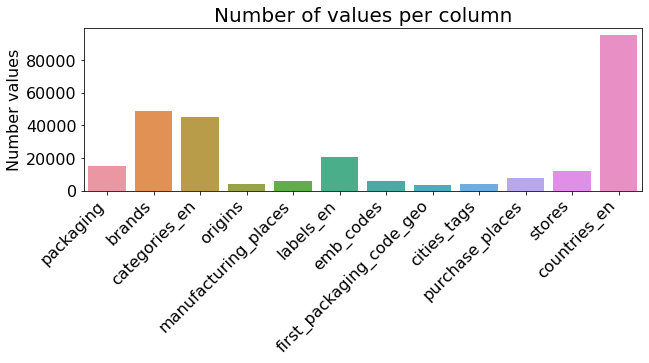

In [206]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=tags.columns, y=tags.apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.2.4.1 Original

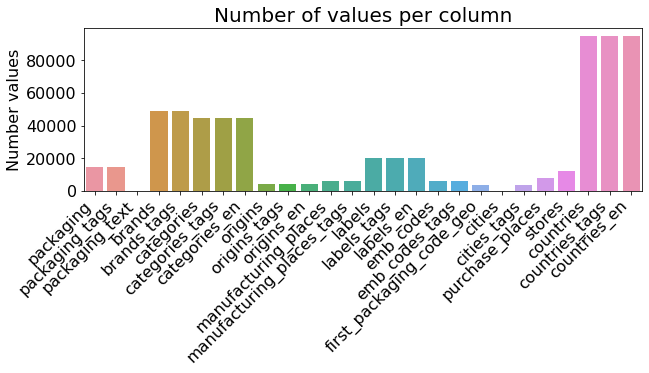

In [207]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=data[tags_features].columns, y=data[tags_features].apply(lambda row: row.count(), axis=0))

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.3 Ingredients group

### 3.3.1 Overview

In [208]:
ingredients_features = data.loc[:, "ingredients_text":"traces_tags"].columns
ingredients_features

Index(['ingredients_text', 'allergens', 'allergens_en', 'traces',
       'traces_tags'],
      dtype='object')

In [209]:
ingredients = data.loc[:, ingredients_features]

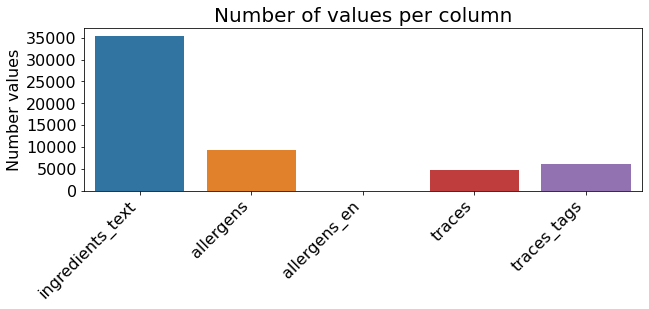

In [210]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients_features, y=ingredients.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [211]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ingredients_text  35406 non-null  object 
 1   allergens         9408 non-null   object 
 2   allergens_en      0 non-null      float64
 3   traces            4925 non-null   object 
 4   traces_tags       6121 non-null   object 
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [212]:
ingredients.head()

,ingredients_text,allergens,allergens_en,traces,traces_tags
57521,"Enriched Corn Meal (Corn Meal, Ferrous Sulfate...",NaN,NaN,NaN,NaN
61462,"Corn flour, sugar, oat flour, brown sugar, pal...",NaN,NaN,NaN,NaN
19388,"Carbonated water, high fructose corn syrup, ci...",NaN,NaN,NaN,NaN
79791,Fuji apples,NaN,NaN,NaN,NaN
30992,"Pasteurized cultured organic low fat milk, org...",NaN,NaN,NaN,NaN


***
### 3.3.2 Usability

#### 3.3.2.1 Usability: allergens_en

"allergens_en" is completely empty.

In [213]:
ingredients.drop(columns=["allergens_en"], inplace=True)

***
### 3.3.3 Redundancy

#### 3.3.3.1 Redundancy: traces, traces_tags

In [214]:
ingredients.loc[:, ["traces", "traces_tags"]].loc[ingredients.traces.notna() & ingredients.traces_tags.notna()].iloc[:20]

,traces,traces_tags
47266,en:nuts,en:nuts
32338,"en:nuts,en:sesame-seeds","en:nuts,en:sesame-seeds"
96868,"en:eggs,en:gluten,en:milk,en:soybeans","en:eggs,en:gluten,en:milk,en:soybeans"
88690,"en:gluten,en:milk","en:gluten,en:milk,en:soybeans"
82975,en:milk,"en:eggs,en:milk"
66919,en:gluten,en:gluten
52544,en:none,en:none
52039,"en:gluten,es:Nuez de la india","en:gluten,es:nuez-de-la-india"
463,"en:milk,en:nuts,en:soybeans","en:milk,en:nuts,en:soybeans"
27706,en:peanuts,en:peanuts


There is, at first sight, no better feature. We will keep "traces"

In [215]:
ingredients.drop(columns=["traces_tags"], inplace=True)

***
### 3.3.4 Conclusion

In [216]:
ingredients.describe()

,ingredients_text,allergens,traces
count,35406,9408,4925
unique,33831,684,1240
top,"Carbonated water, natural flavor.",en:milk,en:nuts
freq,25,1978,441


In [217]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ingredients_text  35406 non-null  object
 1   allergens         9408 non-null   object
 2   traces            4925 non-null   object
dtypes: object(3)
memory usage: 2.9+ MB


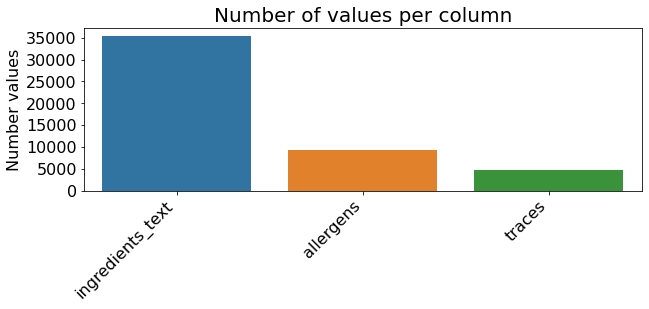

In [218]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients.columns, y=ingredients.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.3.4.1 Original

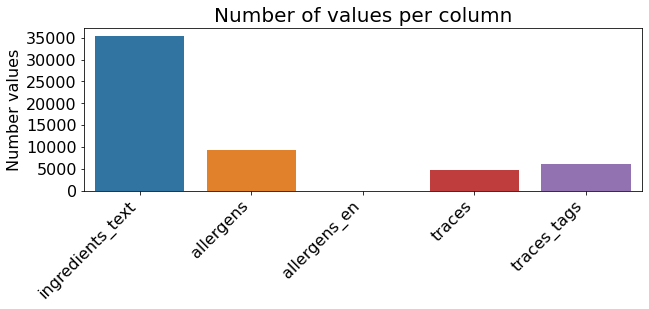

In [219]:
plt.figure(figsize=(10,3))

barplot = sns.barplot(x=ingredients_features, y=data[ingredients_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.4 Misc datas group

#### 3.4.1 Overview

In [220]:
misc_features = data.loc[:,"serving_size":"image_nutrition_small_url"].columns
misc_features

Index(['serving_size', 'serving_quantity', 'no_nutriments', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner',
       'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

In [221]:
misc = data.loc[:, misc_features]

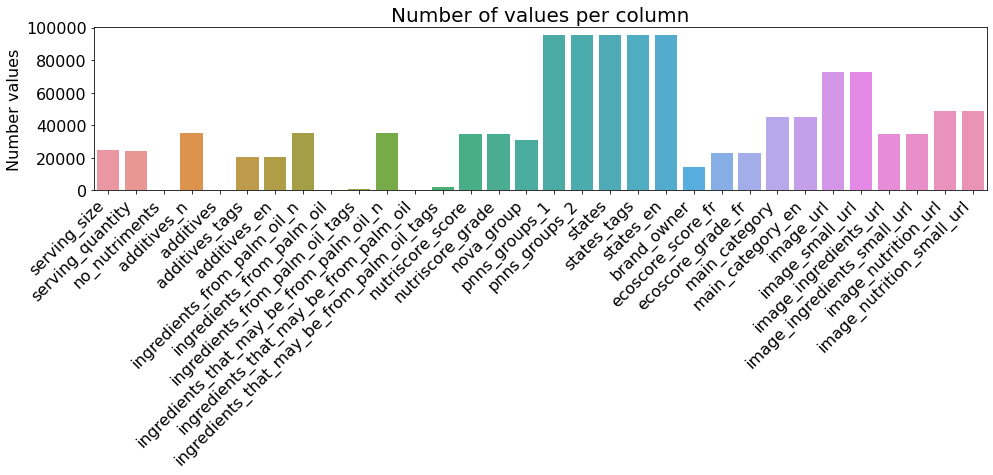

In [222]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc_features, y=data[misc_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [223]:
misc.iloc[:, :16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   serving_size                                24541 non-null  object 
 1   serving_quantity                            24357 non-null  float64
 2   no_nutriments                               0 non-null      float64
 3   additives_n                                 35406 non-null  float64
 4   additives                                   0 non-null      float64
 5   additives_tags                              20463 non-null  object 
 6   additives_en                                20463 non-null  object 
 7   ingredients_from_palm_oil_n                 35406 non-null  float64
 8   ingredients_from_palm_oil                   0 non-null      float64
 9   ingredients_from_palm_oil_tags              729 non-null    object 
 10  ingr

In [224]:
misc.iloc[:, 16:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pnns_groups_1                95349 non-null  object 
 1   pnns_groups_2                95349 non-null  object 
 2   states                       95365 non-null  object 
 3   states_tags                  95365 non-null  object 
 4   states_en                    95365 non-null  object 
 5   brand_owner                  14537 non-null  object 
 6   ecoscore_score_fr            23051 non-null  float64
 7   ecoscore_grade_fr            23051 non-null  object 
 8   main_category                44841 non-null  object 
 9   main_category_en             44841 non-null  object 
 10  image_url                    72558 non-null  object 
 11  image_small_url              72558 non-null  object 
 12  image_ingredients_url        34688 non-null  object 
 13  image_ingr

In [225]:
misc.head(1)

,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,...,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
57521,30g,30.0,NaN,4.0,NaN,"en:e110,en:e270,en:e330,en:e621","E110 - Sunset yellow FCF,E270 - Lactic acid,E3...",0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...


***
### 3.4.2 Usability

These features are competely empty and then will be no needed:
- no_nutriments
- additives
- ingredients_from_palm_oil
- ingredients_that_may_be_from_palm_oil

These features are almost empty, we will get rid of them too:
- ingredients_from_palm_oil_tags
- ingredients_that_may_be_from_palm_oil_tags

In [226]:
misc.drop(columns=["no_nutriments", "additives", "ingredients_from_palm_oil", "ingredients_that_may_be_from_palm_oil", "ingredients_from_palm_oil_tags", "ingredients_that_may_be_from_palm_oil_tags"], inplace=True)

***
### 3.4.3 Redundancy

#### 3.4.3.1 Redundancy: serving_siez, serving_quantity

In [227]:
misc.loc[:, ["serving_size", "serving_quantity"]].iloc[:20]

,serving_size,serving_quantity
57521,30g,30.0
61462,1 Container (43 g) (43 g),43.0
19388,12 OZA (360 ml),360.0
79791,1 LARGE APPLE (242 g),242.0
30992,1 CONTAINER (142 g),142.0
70788,NaN,NaN
9215,28 g (1 oz),28.0
70906,NaN,NaN
52867,NaN,NaN
76602,0.75 cup (100 g),100.0


It appears that the feature "serving_size" is non homogeneous in term of units. The feature "serving_quantity" on the other hand, seems to be only in the same unit (g).
We will keep "serving_quantity"

In [228]:
misc.drop(columns=["serving_size"], inplace=True)

***
#### 3.4.3.2 Redundancy: additives_tags, additives_en

In [229]:
misc.loc[:, ["additives_n", "additives_tags", "additives_en"]].iloc[:10]

,additives_n,additives_tags,additives_en
57521,4.0,"en:e110,en:e270,en:e330,en:e621","E110 - Sunset yellow FCF,E270 - Lactic acid,E3..."
61462,3.0,"en:e102,en:e110,en:e321","E102 - Tartrazine,E110 - Sunset yellow FCF,E32..."
19388,8.0,"en:e129,en:e133,en:e211,en:e330,en:e331,en:e38...","E129 - Allura red ac,E133 - Brilliant blue FCF..."
79791,0.0,NaN,NaN
30992,2.0,"en:e410,en:e440","E410 - Locust bean gum,E440 - Pectins"
70788,NaN,NaN,NaN
9215,2.0,"en:e102,en:e433","E102 - Tartrazine,E433 - Polyoxyethylene sorbi..."
70906,3.0,"en:e132,en:e322,en:e322i,en:e414","E132 - Indigotine,E322 - Lecithins,E322i - Lec..."
52867,NaN,NaN,NaN
76602,7.0,"en:e160a,en:e160ai,en:e202,en:e211,en:e222,en:...","E160a - Carotene,E160ai - Beta-carotene,E202 -..."


The feature "additives_en" contains more informations and seems to be easier to parse compare to "additives_tags". Regarding "additives_n" it's the number of additives, there is no direct redundancy for that feature, we can keep it.
We will keep "additives_en" and "additives_n".

In [230]:
misc.drop(columns=["additives_tags"], inplace=True)

***
#### 3.4.3.3 Redundancy: nutriscore_score, nutriscore_grade

In [231]:
misc.loc[:, ["nutriscore_score", "nutriscore_grade"]].loc[misc.nutriscore_score.notna() & misc.nutriscore_grade.notna()].iloc[:20]

,nutriscore_score,nutriscore_grade
61462,20.0,e
79791,0.0,b
30992,-4.0,a
22091,3.0,c
56999,-5.0,a
40010,11.0,d
63776,15.0,d
8855,22.0,e
53806,1.0,b
17375,11.0,d


We will keep both fields as one is quantitative and other is qualitative.

***
#### 3.4.3.4 Redundancy: pnns_groups_1, pnns_groups_2

In [232]:
misc.loc[:, ["pnns_groups_1", "pnns_groups_2"]].loc[misc.pnns_groups_1.notna()].iloc[:20]

,pnns_groups_1,pnns_groups_2
57521,unknown,unknown
61462,Cereals and potatoes,Cereals
19388,Beverages,Sweetened beverages
79791,unknown,unknown
30992,Milk and dairy products,Cheese
70788,unknown,unknown
9215,unknown,unknown
70906,unknown,unknown
52867,unknown,unknown
76602,unknown,unknown


Both features don't contains same value, we will keep them.

***
#### 3.4.3.5 Redundancy: states, states_tags, states_en

In [233]:
misc.loc[:, ["states", "states_tags", "states_en"]].iloc[:10]

,states,states_tags,states_en
57521,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
61462,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
19388,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
79791,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
30992,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
70788,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
9215,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
70906,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
52867,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
76602,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


Seems to be all useless. Let's see how many rows doesn't contains 'to-be-completed' or 'To be completed' in those features.

In [234]:
misc.loc[~misc.states.str.contains("to-be-completed")].states.count()

766

In [235]:
misc.loc[~misc.states_tags.str.contains("to-be-completed")].states_tags.count()

766

In [236]:
misc.loc[~misc.states_en.str.contains("To be completed")].states_en.count()

3973

These features contains no usefull informations, we will get rid of them.

In [237]:
misc.drop(columns=["states", "states_tags", "states_en"], inplace=True)

***
#### 3.4.3.6 Redundancy: ecoscore_score_fr, ecoscore_grade_fr

In [238]:
misc.loc[:, ["ecoscore_score_fr", "ecoscore_grade_fr"]].loc[misc.ecoscore_score_fr.notna() & misc.ecoscore_grade_fr.notna()].iloc[:20]

,ecoscore_score_fr,ecoscore_grade_fr
30992,34.0,d
56999,34.0,d
63776,28.0,d
53806,34.0,d
13420,80.0,b
47266,22.0,d
81102,74.0,b
58766,90.0,b
70133,77.0,b
42329,21.0,d


As the nutriscore, both ecoscore are usefull, we will keep both.

***
#### 3.4.3.7 Redundancy: main_category, main_category_en

In [239]:
misc.loc[:, ["main_category", "main_category_en"]].iloc[:20]

,main_category,main_category_en
57521,NaN,NaN
61462,en:cereals-and-their-products,Cereals and their products
19388,en:sodas,Sodas
79791,en:fruits-and-vegetables-based-foods,Fruits and vegetables based foods
30992,en:cheeses,Cheeses
70788,en:vitamins,Vitamins
9215,NaN,NaN
70906,NaN,NaN
52867,NaN,NaN
76602,NaN,NaN


We will keep "main_category_en"

In [240]:
misc.drop(columns=["main_category"], inplace=True)

***
### 3.4.4 Conclusion

In [241]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   serving_quantity                         24357 non-null  float64
 1   additives_n                              35406 non-null  float64
 2   additives_en                             20463 non-null  object 
 3   ingredients_from_palm_oil_n              35406 non-null  float64
 4   ingredients_that_may_be_from_palm_oil_n  35406 non-null  float64
 5   nutriscore_score                         34761 non-null  float64
 6   nutriscore_grade                         34761 non-null  object 
 7   nova_group                               30951 non-null  float64
 8   pnns_groups_1                            95349 non-null  object 
 9   pnns_groups_2                            95349 non-null  object 
 10  brand_owner                             

In [242]:
misc.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr
count,24357.000000,35406.000000,35406.000000,35406.000000,34761.000000,30951.000000,23051.000000
mean,106.062125,2.043863,0.020957,0.069564,9.156842,3.433265,43.734068
std,2118.159208,2.911581,0.145783,0.301185,8.876186,0.963802,25.979433
min,0.000000,0.000000,0.000000,0.000000,-14.000000,1.000000,-17.000000
25%,28.000000,0.000000,0.000000,0.000000,2.000000,3.000000,26.000000
50%,52.000000,1.000000,0.000000,0.000000,10.000000,4.000000,38.000000
75%,114.000000,3.000000,0.000000,0.000000,16.000000,4.000000,64.000000
max,330000.000000,29.000000,2.000000,5.000000,40.000000,4.000000,124.000000


In [243]:
misc.loc[:, :"main_category_en"].describe(include=[object])

,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category_en
count,20463,34761,95349,95349,14537,23051,44841
unique,9515,5,11,40,4672,5,5807
top,E330 - Citric acid,d,unknown,unknown,Target Stores,d,Snacks
freq,1194,10719,58780,58780,269,7704,1668


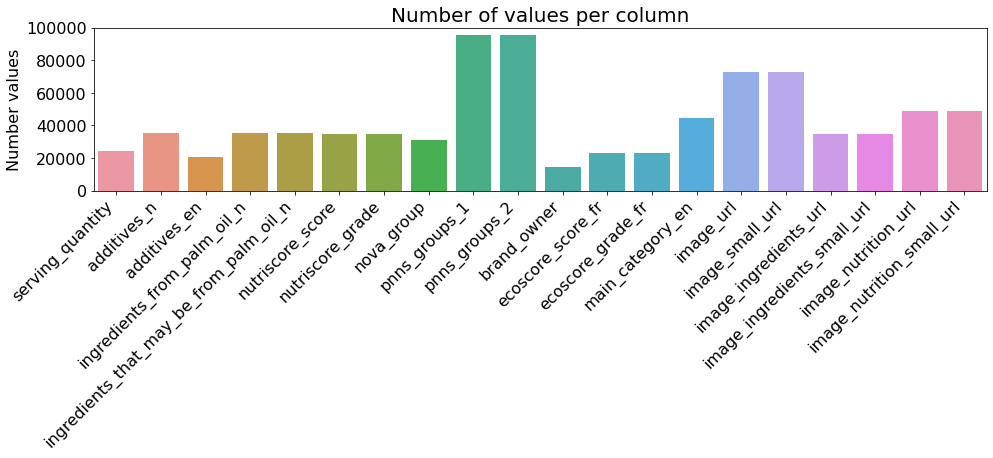

In [244]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc.columns, y=misc.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.4.4.1 Original

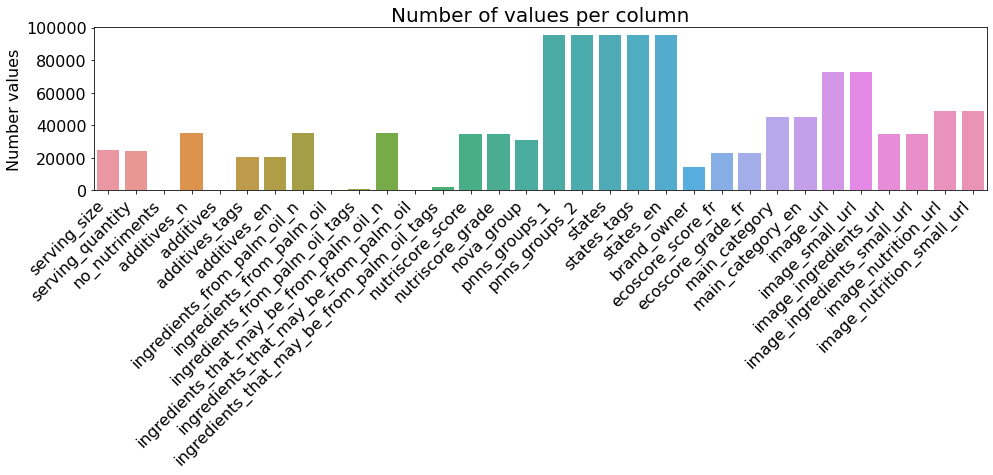

In [245]:
plt.figure(figsize=(16,3))

barplot = sns.barplot(x=misc_features, y=data[misc_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.5 Nutrition facts group

### 3.5.1 Overview

In [246]:
nutr_features = data.loc[:, "energy-kj_100g":"carnitine_100g"].columns
nutr_features

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=111)

In [247]:
nutr = data.loc[:, nutr_features]

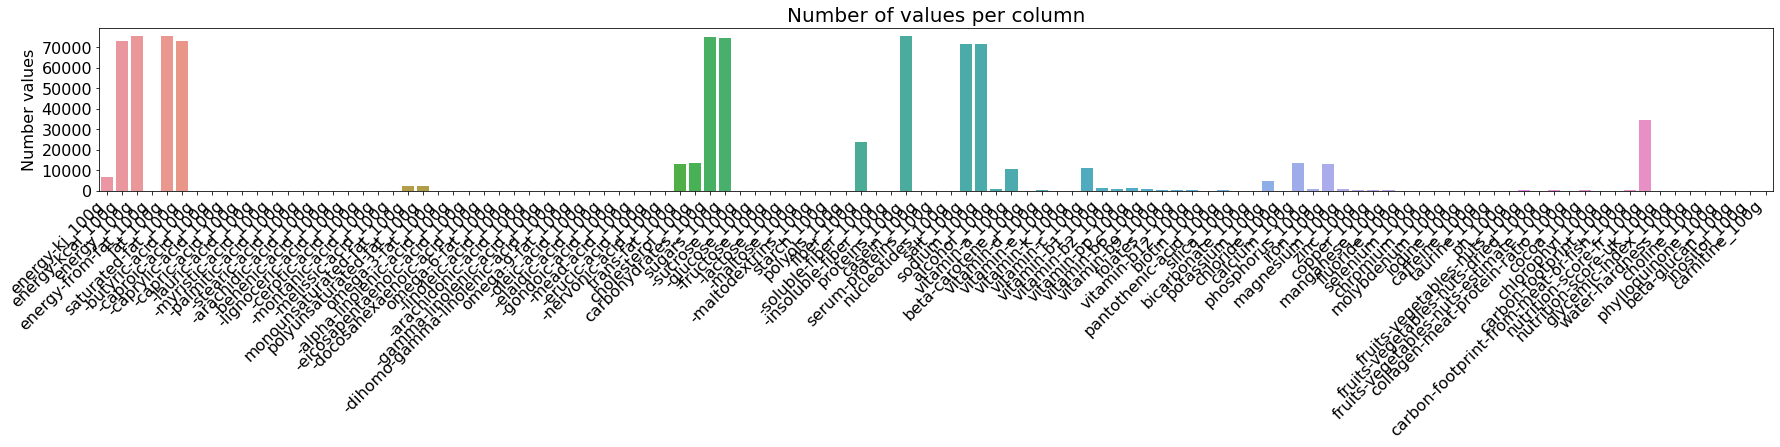

In [248]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr_features, y=nutr.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

In [249]:
nutr.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy-kj_100g        6886 non-null   float64
 1   energy-kcal_100g      73081 non-null  float64
 2   energy_100g           75713 non-null  float64
 3   energy-from-fat_100g  48 non-null     float64
 4   fat_100g              75280 non-null  float64
 5   saturated-fat_100g    73160 non-null  float64
 6   -butyric-acid_100g    0 non-null      float64
 7   -caproic-acid_100g    0 non-null      float64
 8   -caprylic-acid_100g   0 non-null      float64
 9   -capric-acid_100g     0 non-null      float64
dtypes: float64(10)
memory usage: 8.0 MB


In [250]:
nutr.iloc[:, 10:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   -lauric-acid_100g      0 non-null      float64
 1   -myristic-acid_100g    0 non-null      float64
 2   -palmitic-acid_100g    2 non-null      float64
 3   -stearic-acid_100g     0 non-null      float64
 4   -arachidic-acid_100g   11 non-null     float64
 5   -behenic-acid_100g     5 non-null      float64
 6   -lignoceric-acid_100g  0 non-null      float64
 7   -cerotic-acid_100g     1 non-null      float64
 8   -montanic-acid_100g    0 non-null      float64
 9   -melissic-acid_100g    0 non-null      float64
dtypes: float64(10)
memory usage: 8.0 MB


In [251]:
nutr.iloc[:, 20:30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   monounsaturated-fat_100g     2411 non-null   float64
 1   polyunsaturated-fat_100g     2403 non-null   float64
 2   omega-3-fat_100g             96 non-null     float64
 3   -alpha-linolenic-acid_100g   41 non-null     float64
 4   -eicosapentaenoic-acid_100g  9 non-null      float64
 5   -docosahexaenoic-acid_100g   12 non-null     float64
 6   omega-6-fat_100g             20 non-null     float64
 7   -linoleic-acid_100g          20 non-null     float64
 8   -arachidonic-acid_100g       10 non-null     float64
 9   -gamma-linolenic-acid_100g   0 non-null      float64
dtypes: float64(10)
memory usage: 8.0 MB


In [252]:
nutr.iloc[:, 30:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   -dihomo-gamma-linolenic-acid_100g  2 non-null      float64
 1   omega-9-fat_100g                   5 non-null      float64
 2   -oleic-acid_100g                   5 non-null      float64
 3   -elaidic-acid_100g                 0 non-null      float64
 4   -gondoic-acid_100g                 1 non-null      float64
 5   -mead-acid_100g                    0 non-null      float64
 6   -erucic-acid_100g                  0 non-null      float64
 7   -nervonic-acid_100g                2 non-null      float64
 8   trans-fat_100g                     13286 non-null  float64
 9   cholesterol_100g                   13497 non-null  float64
dtypes: float64(10)
memory usage: 8.0 MB


In [253]:
nutr.iloc[:, 40:50].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carbohydrates_100g   75267 non-null  float64
 1   sugars_100g          74500 non-null  float64
 2   -sucrose_100g        5 non-null      float64
 3   -glucose_100g        5 non-null      float64
 4   -fructose_100g       6 non-null      float64
 5   -lactose_100g        36 non-null     float64
 6   -maltose_100g        4 non-null      float64
 7   -maltodextrins_100g  3 non-null      float64
 8   starch_100g          28 non-null     float64
 9   polyols_100g         184 non-null    float64
dtypes: float64(10)
memory usage: 8.0 MB


In [254]:
nutr.iloc[:, 50:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fiber_100g             24050 non-null  float64
 1   -soluble-fiber_100g    175 non-null    float64
 2   -insoluble-fiber_100g  147 non-null    float64
 3   proteins_100g          75358 non-null  float64
 4   casein_100g            4 non-null      float64
 5   serum-proteins_100g    3 non-null      float64
 6   nucleotides_100g       1 non-null      float64
 7   salt_100g              71660 non-null  float64
 8   sodium_100g            71659 non-null  float64
 9   alcohol_100g           1078 non-null   float64
dtypes: float64(10)
memory usage: 8.0 MB


In [255]:
nutr.iloc[:, 60:70].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vitamin-a_100g      10640 non-null  float64
 1   beta-carotene_100g  4 non-null      float64
 2   vitamin-d_100g      443 non-null    float64
 3   vitamin-e_100g      161 non-null    float64
 4   vitamin-k_100g      60 non-null     float64
 5   vitamin-c_100g      11032 non-null  float64
 6   vitamin-b1_100g     1197 non-null   float64
 7   vitamin-b2_100g     1150 non-null   float64
 8   vitamin-pp_100g     1182 non-null   float64
 9   vitamin-b6_100g     779 non-null    float64
dtypes: float64(10)
memory usage: 8.0 MB


In [256]:
nutr.iloc[:, 70:80].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vitamin-b9_100g        512 non-null    float64
 1   folates_100g           428 non-null    float64
 2   vitamin-b12_100g       639 non-null    float64
 3   biotin_100g            60 non-null     float64
 4   pantothenic-acid_100g  290 non-null    float64
 5   silica_100g            12 non-null     float64
 6   bicarbonate_100g       29 non-null     float64
 7   potassium_100g         4677 non-null   float64
 8   chloride_100g          51 non-null     float64
 9   calcium_100g           13604 non-null  float64
dtypes: float64(10)
memory usage: 8.0 MB


In [257]:
nutr.iloc[:, 80:90].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   phosphorus_100g  720 non-null    float64
 1   iron_100g        13312 non-null  float64
 2   magnesium_100g   781 non-null    float64
 3   zinc_100g        512 non-null    float64
 4   copper_100g      223 non-null    float64
 5   manganese_100g   221 non-null    float64
 6   fluoride_100g    27 non-null     float64
 7   selenium_100g    112 non-null    float64
 8   chromium_100g    13 non-null     float64
 9   molybdenum_100g  20 non-null     float64
dtypes: float64(10)
memory usage: 8.0 MB


In [258]:
nutr.iloc[:, 90:100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   iodine_100g                           107 non-null    float64
 1   caffeine_100g                         21 non-null     float64
 2   taurine_100g                          9 non-null      float64
 3   ph_100g                               8 non-null      float64
 4   fruits-vegetables-nuts_100g           473 non-null    float64
 5   fruits-vegetables-nuts-dried_100g     13 non-null     float64
 6   fruits-vegetables-nuts-estimate_100g  597 non-null    float64
 7   collagen-meat-protein-ratio_100g      11 non-null     float64
 8   cocoa_100g                            314 non-null    float64
 9   chlorophyl_100g                       0 non-null      float64
dtypes: float64(10)
memory usage: 8.0 MB


In [259]:
nutr.iloc[:, 100:110].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   carbon-footprint_100g                    22 non-null     float64
 1   carbon-footprint-from-meat-or-fish_100g  611 non-null    float64
 2   nutrition-score-fr_100g                  34761 non-null  float64
 3   nutrition-score-uk_100g                  0 non-null      float64
 4   glycemic-index_100g                      0 non-null      float64
 5   water-hardness_100g                      0 non-null      float64
 6   choline_100g                             2 non-null      float64
 7   phylloquinone_100g                       84 non-null     float64
 8   beta-glucan_100g                         2 non-null      float64
 9   inositol_100g                            3 non-null      float64
dtypes: float64(10)
memory usage: 8.0 MB


In [260]:
nutr.iloc[:, 110:120].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carnitine_100g  2 non-null      float64
dtypes: float64(1)
memory usage: 1.5 MB


***
### 3.5.2 Usability

All features that have less than 1% fill percentage will be dropped.

In [261]:
index_lesser_than_percentage = quickml.index_lth(pd, np, nutr, 5)
index_lesser_than_percentage

Index(['energy-from-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g',
       '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g',
       '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g',
       '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g',
       '-cerotic-acid_100g', '-montanic-acid_100g', '-melissic-acid_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', '-alpha-linolenic-acid_100g',
       '-eicosapentaenoic-acid_100g', '-docosahexaenoic-acid_100g',
       'omega-6-fat_100g', '-linoleic-acid_100g', '-arachidonic-acid_100g',
       '-gamma-linolenic-acid_100g', '-dihomo-gamma-linolenic-acid_100g',
       'omega-9-fat_100g', '-oleic-acid_100g', '-elaidic-acid_100g',
       '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g',
       '-nervonic-acid_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g', '-lactose_100g', '-maltose_100g',
       '-maltodextrins_100

In [262]:
nutr.drop(columns=index_lesser_than_percentage, inplace=True)

***
### 3.5.3 Redundancy

#### 3.5.3.1 Redundancy: nutrition-score-fr_100g

nutrition-score-fr_100g is redundant with "nutriscore_score" and "nutriscore_grade". It will be dropped.

In [263]:
nutr.drop(columns=["nutrition-score-fr_100g"], inplace=True)

***
#### 3.5.3.2 Redundancy: energy-kj_100g, energy-kcal_100g, energy_100g

In [264]:
nutr.loc[:, ["energy-kj_100g", "energy-kcal_100g", "energy_100g"]].loc[nutr["energy-kj_100g"].notna()].iloc[:10]

,energy-kj_100g,energy-kcal_100g,energy_100g
46608,1147.0,NaN,1147.0
92843,975.0,233.0,975.0
52039,96.5,12.1,96.5
21492,130.0,467.0,130.0
59564,988.0,NaN,988.0
1599,1809.0,NaN,1809.0
1345,1449.0,349.0,1449.0
61112,1539.5,366.5,1539.5
3690,1420.0,335.0,1420.0
3076,843.0,201.0,843.0


The "energy-kj_100g" is much emptier than the two other energy features and bring no additional infos.
The feature "energy-kcal_100g" has explicit unit and is the most filled.

We will keep only "energy-kcal_100g"

In [265]:
nutr.drop(columns=["energy-kj_100g", "energy_100g"], inplace=True)

***
### 3.5.4 Conclusion

In [266]:
nutr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95365 entries, 57521 to 1905868
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy-kcal_100g    73081 non-null  float64
 1   fat_100g            75280 non-null  float64
 2   saturated-fat_100g  73160 non-null  float64
 3   trans-fat_100g      13286 non-null  float64
 4   cholesterol_100g    13497 non-null  float64
 5   carbohydrates_100g  75267 non-null  float64
 6   sugars_100g         74500 non-null  float64
 7   fiber_100g          24050 non-null  float64
 8   proteins_100g       75358 non-null  float64
 9   salt_100g           71660 non-null  float64
 10  sodium_100g         71659 non-null  float64
 11  vitamin-a_100g      10640 non-null  float64
 12  vitamin-c_100g      11032 non-null  float64
 13  calcium_100g        13604 non-null  float64
 14  iron_100g           13312 non-null  float64
dtypes: float64(15)
memory usage: 11.6 MB


In [267]:
nutr.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,73081.000000,75280.000000,73160.000000,13286.000000,13497.000000,75267.000000,74500.000000,24050.000000,75358.000000,71660.000000,71659.000000,10640.000000,11032.000000,13604.000000,13312.000000
mean,281.697821,13.670652,5.159117,0.047901,0.061404,28.264651,13.188365,3.109508,8.629408,1.718012,0.687303,0.165151,0.047779,0.165904,0.014898
std,1804.357952,18.466793,13.812136,1.217349,1.554465,31.262106,20.442299,12.065607,10.606946,28.203276,11.294808,11.031329,1.463692,3.923542,1.053200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,0.700000,0.100000,0.000000,0.000000,3.500000,0.600000,0.000000,1.300000,0.072500,0.029000,0.000000,0.000000,0.000000,0.000000
50%,260.000000,7.000000,1.800000,0.000000,0.000000,15.040000,3.570000,1.600000,6.000000,0.580000,0.232000,0.000000,0.000000,0.036000,0.001000
75%,400.000000,21.052608,7.140000,0.000000,0.022000,53.100000,17.700000,3.600000,12.300000,1.400000,0.560000,0.000107,0.004200,0.110000,0.002410
max,484000.000000,1300.000000,3030.000000,120.000000,71.429000,2300.000000,1580.000000,1600.000000,1000.000000,4460.000000,1790.000000,800.000000,85.720000,350.000000,120.000000


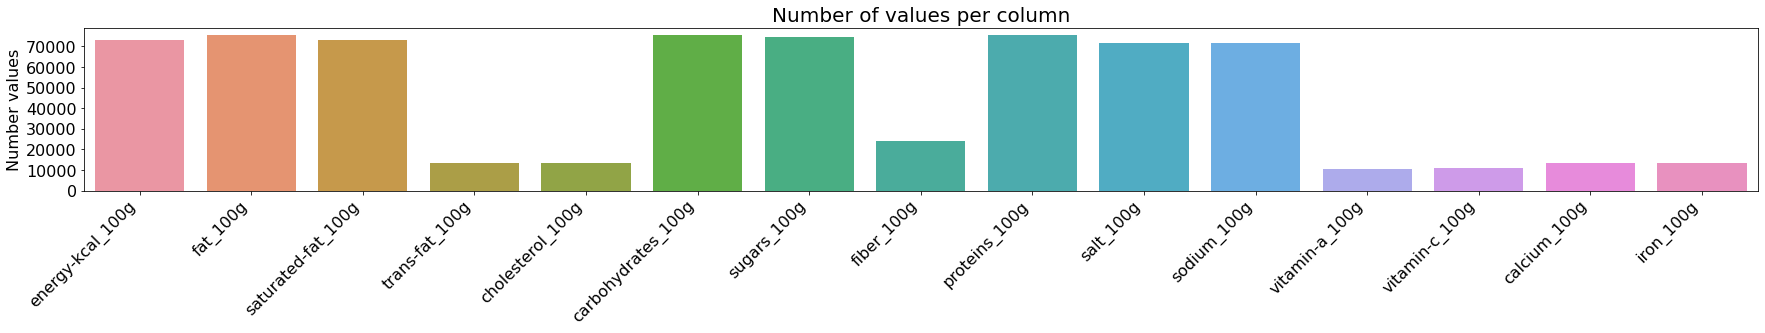

In [268]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr.columns, y=nutr.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

#### 3.5.4.1 Original

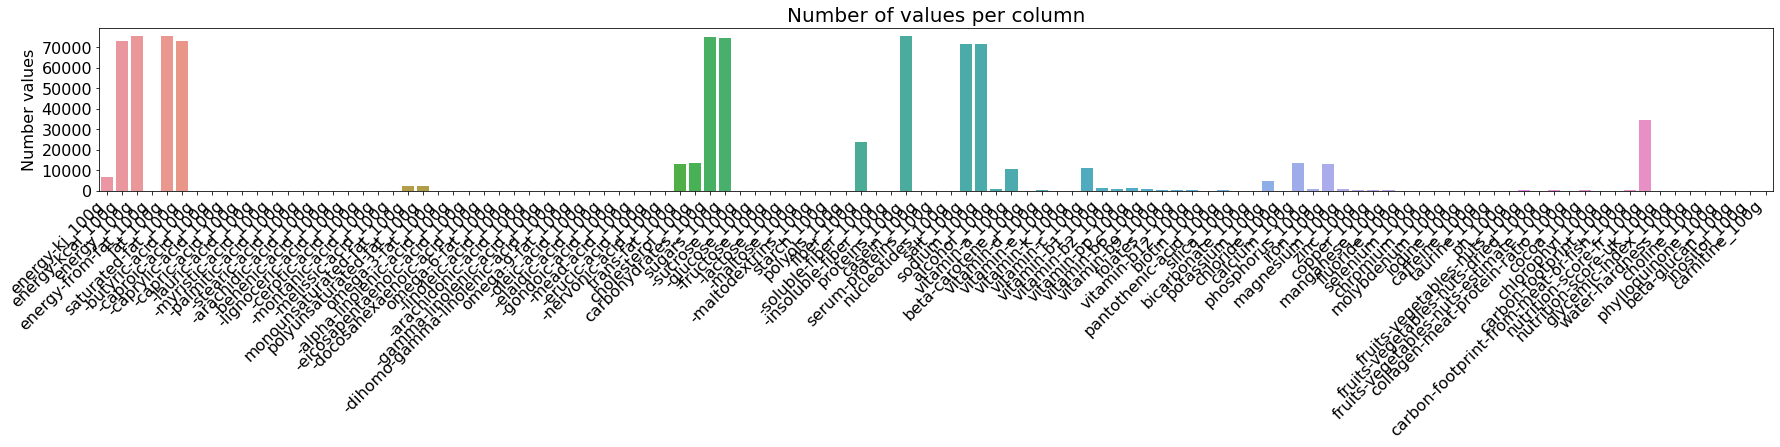

In [269]:
plt.figure(figsize=(30,3))

barplot = sns.barplot(x=nutr_features, y=data[nutr_features].count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
## 3.6 Results

In [286]:
general_infos.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name
57521,28400081498,http://world-en.openfoodfacts.org/product/0028...,openfoodfacts-contributors,1577935741,2020-01-02T03:29:01Z,1622051938,2021-05-26T17:58:58Z,Cheetos
61462,30000315972,http://world-en.openfoodfacts.org/product/0030...,org-database-usda,1587639086,2020-04-23T10:51:26Z,1587639087,2020-04-23T10:51:27Z,Cap'N Crunch Sweetened Corn & Oat Cereal 1.51 ...
19388,0012000684548,http://world-en.openfoodfacts.org/product/0012...,org-database-usda,1587648518,2020-04-23T13:28:38Z,1587648519,2020-04-23T13:28:39Z,Soda
79791,36800334991,http://world-en.openfoodfacts.org/product/0036...,org-database-usda,1587661793,2020-04-23T17:09:53Z,1587661793,2020-04-23T17:09:53Z,Fuji apples
30992,17077316064,http://world-en.openfoodfacts.org/product/0017...,org-database-usda,1587658212,2020-04-23T16:10:12Z,1587658212,2020-04-23T16:10:12Z,Organic farmer cheese


In [287]:
misc.head()

,serving_quantity,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
57521,30.0,4.0,"E110 - Sunset yellow FCF,E270 - Lactic acid,E3...",0.0,0.0,NaN,NaN,4.0,unknown,unknown,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
61462,43.0,3.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E32...",0.0,0.0,20.0,e,4.0,Cereals and potatoes,Cereals,QTG,NaN,NaN,Cereals and their products,NaN,NaN,NaN,NaN,NaN,NaN
19388,360.0,8.0,"E129 - Allura red ac,E133 - Brilliant blue FCF...",0.0,0.0,NaN,NaN,4.0,Beverages,Sweetened beverages,MNT DEW,NaN,NaN,Sodas,NaN,NaN,NaN,NaN,NaN,NaN
79791,242.0,0.0,NaN,0.0,0.0,0.0,b,NaN,unknown,unknown,"Topco Associates, Inc.",NaN,NaN,Fruits and vegetables based foods,NaN,NaN,NaN,NaN,NaN,NaN
30992,142.0,2.0,"E410 - Locust bean gum,E440 - Pectins",0.0,0.0,-4.0,a,4.0,Milk and dairy products,Cheese,Lifeway Foods Inc.,34.0,d,Cheeses,NaN,NaN,NaN,NaN,NaN,NaN


_____________________________________________________________________ END TESTS _________________________________________________________________________________

In [303]:
features = general_infos.join([tags, ingredients, misc, nutr])

In [304]:
features.shape

(95365, 58)

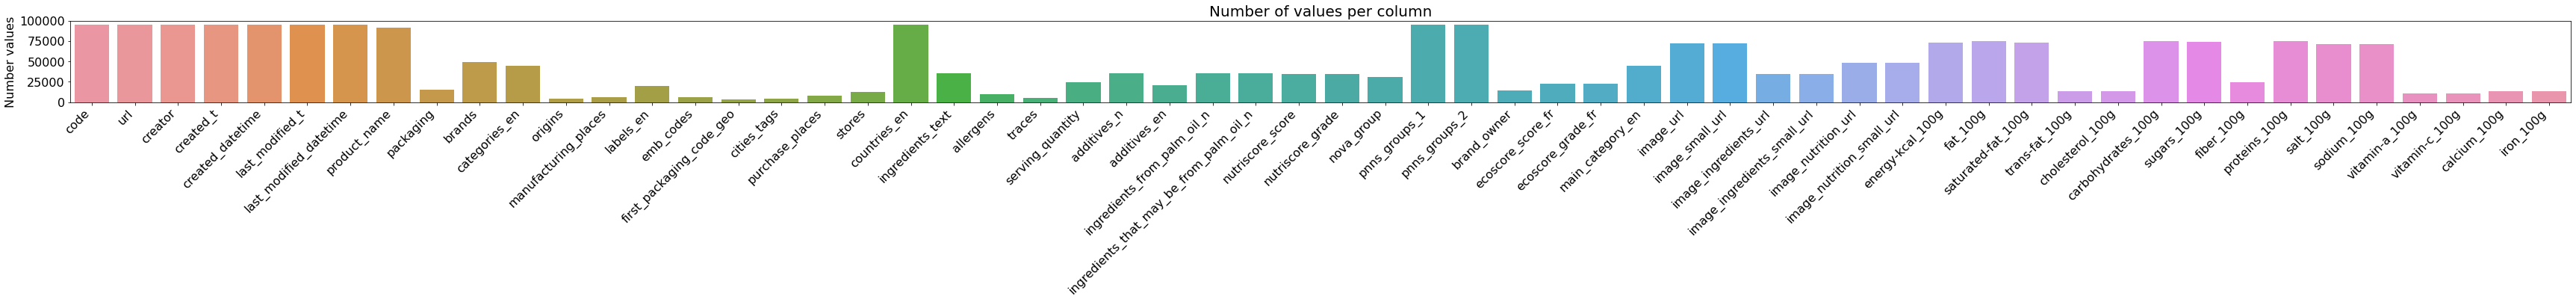

In [305]:
plt.figure(figsize=(60,2))

barplot = sns.barplot(x=features.columns, y=features.count())

plt.title("Number of values per column", size=20)
plt.xticks(rotation=45, size=16, ha="right")
plt.yticks(size=16)
plt.ylabel("Number values", size=16)
plt.show()

***
# 4 Saving

In [306]:
features.shape

(95365, 58)

In [307]:
features.to_csv("datas/sample.csv", sep=";")

***
# ? Nutriscore

## Nutriscore feature analysis

In [308]:
nutriscore_features = [
    "fruits-vegetables-nuts_100g",
    "proteins_100g",
    "fiber_100g",
    "sugars_100g",
    "salt_100g",
    "saturated-fat_100g",
    "energy-kcal_100g"
]

In [112]:
nutriscore_data = data.loc[:, ["nutriscore_score", "nutriscore_grade", "nutrition-score-fr_100g"]]
nutriscore_data.head(10)

,nutriscore_score,nutriscore_grade,nutrition-score-fr_100g
67075,1.0,b,1.0
14858,26.0,e,26.0
89718,NaN,NaN,NaN
10473,NaN,NaN,NaN
45994,NaN,NaN,NaN
85492,NaN,NaN,NaN
92986,3.0,c,3.0
18758,NaN,NaN,NaN
82612,-3.0,a,-3.0
71882,19.0,e,19.0


In [309]:
na = nutriscore_data.any(axis="columns")
print("at least one value: ", na.sum())
print("nutriscore_grade recorded: ", data.nutriscore_grade.notna().sum())
print("all rows: ", na.count())

We can see that these threee features "nutriscore_score", "nutriscore_grade" and "nutrition-fr_100G" are redundant. Each time there is at least one of them recorded, the two others are also filled.

We can then get ride of "nutrition-fr_100g" and keep the two others.

In [310]:
features += ["nutriscore_score", "nutriscore_grade"]

ValueError: Unable to coerce to Series, length must be 58: given 2

Too few entries have nutriscore cell filled, around 33%.
Could be a way to calculate it manually from other fields ?

## Nutriscore needed data

Is there a way to calculate Nutriscore from the others information ?

For that, we need to have the P and N ingredients of the nutriscore formula.

P (positive) ingredients:
- fruits, vegetable, nuts
- proteins
- fiber

N (negative) ingredients:
- sugar
- salt
- saturated fatty acid
- energy (kcal)

In [ ]:
p = [
    "fruit",
    "vegetable",
    "nuts",
    "olive",
    "fiber"
]

In [ ]:
n = [
    "sugar",
    "sodium",
    "saturated fatr"
]

## Search for needed fields/features

In [ ]:
results = []
for ingredient in p + n:
    for column in data.columns:
        if ingredient in column:
            results.append(column)
print(len(results))
results

## Nutriscore's features content analysis

They are the fields needed for the nutriscore formulas, but:
- "fruits-vegetables-nuts_100g": completely empty
- "fiber": too fews records, but could simply be due to the fact not all product contains fiber

## Where are the fruits, vegetables and nuts ?

In [ ]:
pd.set_option('display.max_colwidth', None)

ingredient_text_data = data[data.ingredients_text.notna()].ingredients_text
ingredient_text_data.head(5)

In [ ]:
def search(row, col: str, match: list):
    for m in match:
        if m in row[col]:
            print("row[col]: ", row[col])
            # return row[col].index

data[data.ingredients_text.notna()].iloc[:10].apply(lambda row: search(row, "ingredients_text", p), axis=1)

Even if we succed to demonstrate the concentration in fruits/evetables/nuts of certain products, we still can't calculate the nutriscore because we don't have the proportion of those elements per 100g.

### Conclusion
There is now way to calculate the nutriscore.